In [4]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
from scipy.spatial.distance import cdist

In [9]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
tform1 = StandardScaler()
tform=transforms.Compose([
                           transforms.ToTensor()])
def fileFeedforGNN(name):

  data = pd.read_table(name)

  

  y = data.iloc[:,-3].values
  
  
  print(np.unique(y))


  graphList = []
  


    
  #num_objects	r_std	r_var	r_mean	r_min	r_max	snr_std	snr_var	snr_mean	snr_min	snr_max	noise_std	noise_var	noise_mean	noise_min	noise_max	obj	environment	
  X_array = data.iloc[:, 0:16].values

  X_array = tform1.fit_transform(X_array)
  

  addList_bot, addList_clothes, addList_plastics, addList_steel  = [],[],[],[]
    
  for i in range(len(X_array)):
    intarray = X_array[i]
    if(y[i] =='bot'):
      addList_bot.append(intarray)
    elif (y[i] == 'clothes'):
      addList_clothes.append(intarray)
    elif (y[i] == 'plastic'):
      addList_plastics.append(intarray)
    elif (y[i] == 'steel'):
      addList_steel.append(intarray)
  
  len_img = 1
  for i in range(len(addList_bot) - (len_img-1) ):
    
    
        img = addList_bot[i]
        
        # img = np.array(addList_bot[i:i+len_img])
        # img = np.reshape(img, (1,len_img*16))
        
        if(i<1):
            print(img.shape)
            print(img)
        
        graphList.append((img,0))

  for i in range(len(addList_clothes)  - len_img-1):
    
        img = addList_clothes[i]
    
        # img = np.array(addList_clothes[i:i+len_img])
        # img = np.reshape(img, (1,len_img*16))      
        # if(i<1):
        #     print(img)
        
        graphList.append(((img),1))
        
  for i in range(len(addList_plastics) - len_img-1):
        
        img = addList_plastics[i]
        # img = np.array(addList_plastics[i:i+len_img])
        # img = np.reshape(img, (1,len_img*16))    
        # if(i<1):
        #     print(img)
            
        graphList.append(((img),2))
        
  for i in range(len(addList_steel) - len_img-1):
        img = addList_steel[i]
    
        # img = np.array(addList_steel[i:i+len_img])
        # img = np.reshape(img, (1,len_img*16))       
        # if(i<1):
        #     print(img)
        graphList.append(((img),3))
  
  
  
  print(len(graphList))
    
    
 
  return graphList




############################## data loading for 3.5 inch#####################

graphList_lablight_3_5 = fileFeedforGNN('lablight_3.5_.txt')
graphList_night_3_5 = fileFeedforGNN('night_3.5_.txt')
graphList_sunny_3_5 = fileFeedforGNN('sunny_3.5_.txt')


lablight_train_len = int(len(graphList_lablight_3_5)*0.7)
night_train_len = int(len(graphList_night_3_5)*0.7)
sunny_tarin_len = int(len(graphList_sunny_3_5)*0.7)


batch_size=64
test_batch_size=64

random.shuffle(graphList_lablight_3_5)
random.shuffle(graphList_night_3_5)
random.shuffle(graphList_sunny_3_5)

train_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[0:lablight_train_len],batch_size)  
test_loader_lablight_3_5 = torch.utils.data.DataLoader(graphList_lablight_3_5[lablight_train_len:],test_batch_size) 

train_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[0:night_train_len],batch_size)  
test_loader_night_3_5 = torch.utils.data.DataLoader(graphList_night_3_5[night_train_len:],test_batch_size) 

train_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[0:sunny_tarin_len],batch_size)  
test_loader_sunny_3_5 = torch.utils.data.DataLoader(graphList_sunny_3_5[sunny_tarin_len:],test_batch_size) 

print(len(graphList_lablight_3_5))
print(len(graphList_night_3_5))
print(len(graphList_sunny_3_5))



############################## data loading for 7 inch#####################

graphList_lablight_7= fileFeedforGNN('lablight_7_.txt')
graphList_night_7 = fileFeedforGNN('night_7_.txt')
graphList_sunny_7 = fileFeedforGNN('sunny_7_.txt')


lablight_train_len = int(len(graphList_lablight_7)*0.7)
night_train_len = int(len(graphList_night_7)*0.7)
sunny_tarin_len = int(len(graphList_sunny_7)*0.7)


batch_size=64
test_batch_size=64

random.shuffle(graphList_lablight_7)
random.shuffle(graphList_night_7)
random.shuffle(graphList_sunny_7)

train_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[0:lablight_train_len],batch_size)  
test_loader_lablight_7 = torch.utils.data.DataLoader(graphList_lablight_7[lablight_train_len:],test_batch_size) 

train_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[0:night_train_len],batch_size)  
test_loader_night_7 = torch.utils.data.DataLoader(graphList_night_7[night_train_len:],test_batch_size) 

train_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[0:sunny_tarin_len],batch_size)  
test_loader_sunny_7= torch.utils.data.DataLoader(graphList_sunny_7[sunny_tarin_len:],test_batch_size) 

print(len(test_loader_sunny_7)*64)

print(len(graphList_lablight_7))
print(len(graphList_night_7))
print(len(graphList_sunny_7))


['bot' 'clothes' 'plastic' 'steel']
(16,)
[-1.23397573  1.78276182  2.29189375 -0.22418935 -0.74600212  0.69335467
 -0.30632434 -0.44352312  1.51627141  1.7736046   0.08524429 -1.45067905
 -1.33666386 -0.79374984  0.60972278 -1.47148231]
4210
['bot' 'clothes' 'plastic' 'steel']
(16,)
[-0.11424652  1.36008754  1.62643419  1.36772054 -0.85101599  0.75428666
 -0.68615867 -0.65092941 -0.54137917 -0.3779489  -0.61704084  0.01193378
 -0.20924374  0.40038366 -0.00345386  0.12386057]
3701
['bot' 'clothes' 'plastic' 'steel']
(16,)
[ 0.28722815  0.68867265  0.65672104  1.20966038 -0.7596282   0.57984919
 -0.22366514 -0.33143833 -0.45122575 -0.64746339 -0.78686589 -0.54360374
 -0.65740082  0.16166404  0.35521838  0.19019796]
3688
4210
3701
3688
['bot' 'clothes' 'plastic' 'steel']
(16,)
[ 1.0596922   0.66502649  0.56543973  1.57961691 -0.4689876   1.11907398
 -0.87708606 -0.79503343 -1.16081027 -0.50775921 -1.12770613  1.56782687
  1.68209776  0.85053538  0.10988301  2.37294714]
3978
['bot' 'cloth

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 

class_labels = 4
classes = ('bot', 'clothes', 'plastic', 'steel')




feature_vector_len = 16 # [num_objects,std,var,mean,min,max,enviroment]
num_output_classes = 4


Number_of_neurons = 16



#   model3 = nn.Sequential(
#       nn.Linear(feature_vector_len,Number_of_neurons),
#       nn.ReLU(),
#       nn.Linear(Number_of_neurons,Number_of_neurons),
#       nn.ReLU(),
#       nn.Linear(Number_of_neurons,num_output_classes),
#       nn.Softmax()
#       )
conv_row,conv_col = 1,103
out_channel = 1

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
       
        
        self.fc1 = nn.Linear(feature_vector_len,Number_of_neurons)
        self.fc2 = nn.Linear(Number_of_neurons,Number_of_neurons)
        self.fc3 =  nn.Linear(Number_of_neurons,num_output_classes)
        self.fc4 = nn.Softmax()
        

    def forward(self, x):

        
        x = F.relu(self.fc1(x))              
        x = F.relu(self.fc2(x))            
        x = self.fc3(x)
        x = self.fc4(x)
        #x = F.softmax(x,dim=1)
        return x


def testAccuracy(model,test_loader):  
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        n_class_correct = [0 for i in range(class_labels)]
        n_class_samples = [0 for i in range(class_labels)]
        for images, labels in test_loader:

            #images = images.FloatTensor()
            #images = images.unsqueeze(1) 
            images = images.to(device).float()
            labels = labels.to(device)
            outputs = model(images)
            # max returns (value ,index)
            _, predicted = torch.max(outputs, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

            for i in range(len(labels)):
                label = labels[i]
                pred = predicted[i]
                if (label == pred):
                    n_class_correct[label] += 1
                n_class_samples[label] += 1
        
        
        #print('testing accuracy')

        total_acc = 100.0 * n_correct / n_samples
        #print(f'Accuracy of the network: {total_acc} %')


        for i in range(class_labels):
            acc = 100.0 * n_class_correct[i] / n_class_samples[i]
            #print(f'Accuracy of {classes[i]}: {acc} %')
        
        return total_acc

    
def modelTrainer(train_loader,test_loader):
    
    num_epochs = 150
    
    learning_rate = 0.001

    class_labels = 4

    #train_loader, test_loader = train_loader_lablight_3_5,test_loader_lablight_3_5 


    #print(len(train_loader)*64)

    classes = ('bot', 'clothes', 'plastic', 'steel')

    # get some random training images
    dataiter = iter(train_loader)
    images, labels = next(dataiter)

    model = ConvNet().to(device)
    print(model)

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


    bestaccuracy = 0
    bestepoch = 0

    accList = []
    lossList = []

    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # origin shape: [4, 3, 32, 32] = 4, 3, 1024
            # input_layer: 3 input channels, 6 output channels, 5 kernel size
            
            #print(images.shape)

            #images = images.unsqueeze(1)  
            images = images.to(device).float()
            labels = labels.to(device)
            
            

            # Forward pass
            outputs = model(images)
            
            # print(outputs)
            # print(labels)
            
            loss = criterion(outputs, labels)

            # Backward and optimize
            # optimizer.zero_grad()
            # loss.backward()
            # optimizer.step()
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
       
        accuracy = testAccuracy(model,test_loader)

        print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f},Accuracy: {accuracy} ')
        
        accList.append(accuracy)
        lossList.append(loss.item())

        if(bestaccuracy < accuracy):
            bestaccuracy = accuracy
            bestepoch = epoch
            PATH = './cnn.pth'
            torch.save(model.state_dict(), PATH)


    print('Finished Training')
  

    print(bestaccuracy)
    print(bestepoch)
    
    return accList,lossList



print("7")
print("train lablight and test lablight")
accList_7_lab,lossList_7_lab = modelTrainer(train_loader_lablight_7,test_loader_lablight_7)
# print("train lablight and test night")
# accList_7_lab_night,lossList_7_lab_night = modelTrainer(train_loader_lablight_7,test_loader_night_7)
# print("train lablight and test sunny")
# accList_7_lab_sunny,lossList_7_lab_sunny = modelTrainer(train_loader_lablight_7,test_loader_sunny_7)
# print("train night and test night")
# accList_7_night,lossList_7_night = modelTrainer(train_loader_night_7,test_loader_night_7)
# print("train night and test lablight")
# accList_7_night_lab,lossList_7_night_lab = modelTrainer(train_loader_night_7,test_loader_lablight_7)
# print("train night and test sunny")
# accList_7_night_sunny,lossList_7_night_sunny = modelTrainer(train_loader_night_7,test_loader_sunny_7)
# print("train sunny and test sunny")
# accList_7_sunny,lossList_7_sunny = modelTrainer(train_loader_sunny_7,test_loader_sunny_7)
# print("train sunny and test night")
# accList_7_sunny_night,lossList_7_sunny_night = modelTrainer(train_loader_sunny_7,test_loader_night_7)
# print("train sunny and test lablight")
# accList_7_sunny_lab,lossList_7_sunny_lab = modelTrainer(train_loader_sunny_7,test_loader_lablight_7)




7
train lablight and test lablight
ConvNet(
  (fc1): Linear(in_features=16, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
  (fc4): Softmax(dim=None)
)
Epoch [1/150], Step [44/44], Loss: 1.3589,Accuracy: 37.688442211055275 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/150], Step [44/44], Loss: 1.3235,Accuracy: 44.30485762144053 
Epoch [3/150], Step [44/44], Loss: 1.2918,Accuracy: 46.733668341708544 
Epoch [4/150], Step [44/44], Loss: 1.2540,Accuracy: 47.98994974874372 
Epoch [5/150], Step [44/44], Loss: 1.2250,Accuracy: 48.24120603015076 
Epoch [6/150], Step [44/44], Loss: 1.2053,Accuracy: 49.58123953098828 
Epoch [7/150], Step [44/44], Loss: 1.1911,Accuracy: 52.51256281407035 
Epoch [8/150], Step [44/44], Loss: 1.1786,Accuracy: 55.778894472361806 
Epoch [9/150], Step [44/44], Loss: 1.1715,Accuracy: 58.29145728643216 
Epoch [10/150], Step [44/44], Loss: 1.1637,Accuracy: 60.301507537688444 
Epoch [11/150], Step [44/44], Loss: 1.1509,Accuracy: 61.47403685092127 
Epoch [12/150], Step [44/44], Loss: 1.1365,Accuracy: 62.89782244556114 
Epoch [13/150], Step [44/44], Loss: 1.1225,Accuracy: 64.48911222780569 
Epoch [14/150], Step [44/44], Loss: 1.1099,Accuracy: 65.82914572864321 
Epoch [15/150], Step [44/44], Loss: 1.0988,Accuracy: 66.2479061976549

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


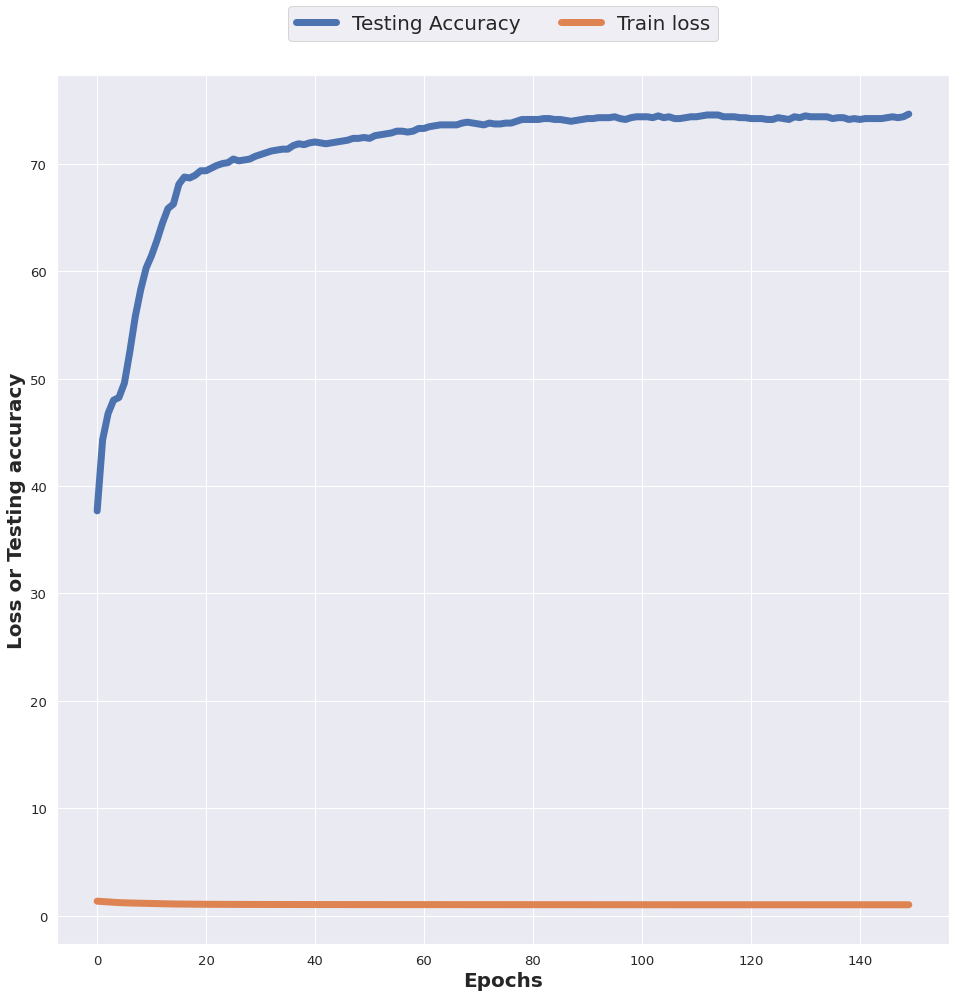

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = [i for i in range(150)]


sns.set(rc={'figure.figsize':(16,16) },font_scale=1.2)
fig, ax0 = plt.subplots(1, 1)

y1 = accList_7_lab

    #print(y)
var = 7

# plotting strip plot with seaborn
sns.lineplot(x, y1,ax=ax0,linewidth = var)


y2 = lossList_7_lab
#print(y)

sns.lineplot(x, y2, ax = ax0,linewidth = var)

# giving labels to x-axis and y-axis
ax0.set(xlabel ='Epochs', ylabel ='Loss or Testing accuracy')

ax0.set_xlabel(ax0.get_xlabel(), fontdict={'weight': 'bold'}, fontsize = 20)
ax0.set_ylabel(ax0.get_ylabel(), fontdict={'weight': 'bold'},fontsize = 20)
ax0.legend(['Testing Accuracy', 'Train loss'],fontsize = 20,loc='upper center',bbox_to_anchor=(0.5, 1.09),
ncol=2)

plt.savefig('lablight'+'.PNG', bbox_inches = "tight")
    

In [ ]:
listForfigure = []

listForfigure.append(history_sunny)
# listForfigure.append(history_lablight)
# listForfigure.append(history_dark)
# listForfigure.append(history_train_sunny_test_dark)
# listForfigure.append(history_train_sunny_test_lablight)
# listForfigure.append(history_train_lablight_test_sunny)
# listForfigure.append(history_train_lablight_test_dark)
# listForfigure.append(history_train_dark_test_sunny)
# listForfigure.append(history_train_dark_test_lablight)


listForfigureName = []

listForfigureName.append("history_tain_and_test_sunny")
# listForfigureName.append("history_train_and_test_lablight")
# listForfigureName.append("history_train_and_test_dark")
# listForfigureName.append("history_train_sunny_test_dark")
# listForfigureName.append("history_train_sunny_test_lablight")
# listForfigureName.append("history_train_lablight_test_sunny")
# listForfigureName.append("history_train_lablight_test_dark")
# listForfigureName.append("history_train_dark_test_sunny")
# listForfigureName.append("history_train_dark_test_lablight")

ValueError: x and y must have same first dimension, but have shapes (100,) and (46100,)

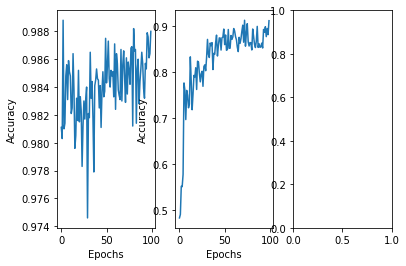

In [28]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = [i for i in range(100)]


fig = plt.figure()

# total_rows, total_columns, subplot_index(1st, 2nd, etc..)
plt.subplot(1, 3, 1)
plt.plot(xpoints, acc_s_List)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(xpoints, acc_t_List)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 3)
plt.plot(xpoints, eRRs)
plt.xlabel('Epochs')
plt.ylabel('Error')
